In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
df = pd.read_csv('Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [12]:
df.rename(columns={'DATE': 'Date' ,'IPG2211A2N':'Values' }, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    397 non-null    object 
 1   Values  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    397 non-null    datetime64[ns]
 1   Values  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [20]:
df.set_index('Date' , inplace = True)

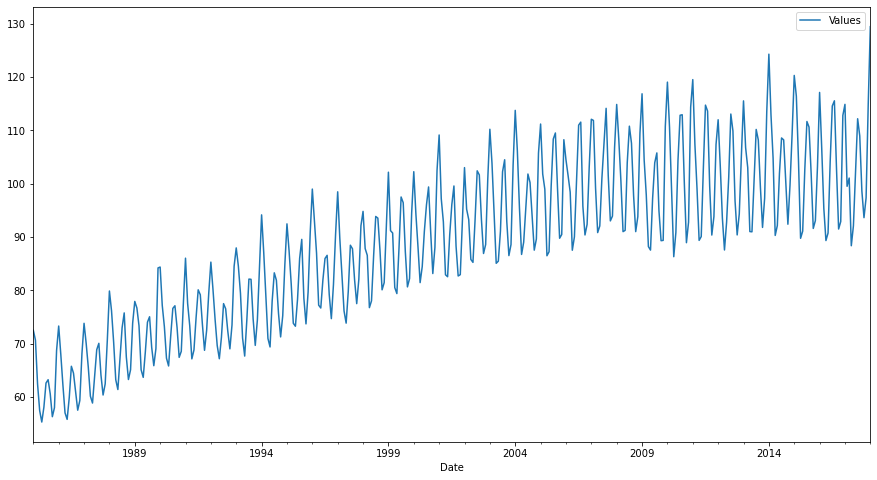

In [24]:
df.plot(figsize = (15,8))
plt.show()

## DECOMPOSITION

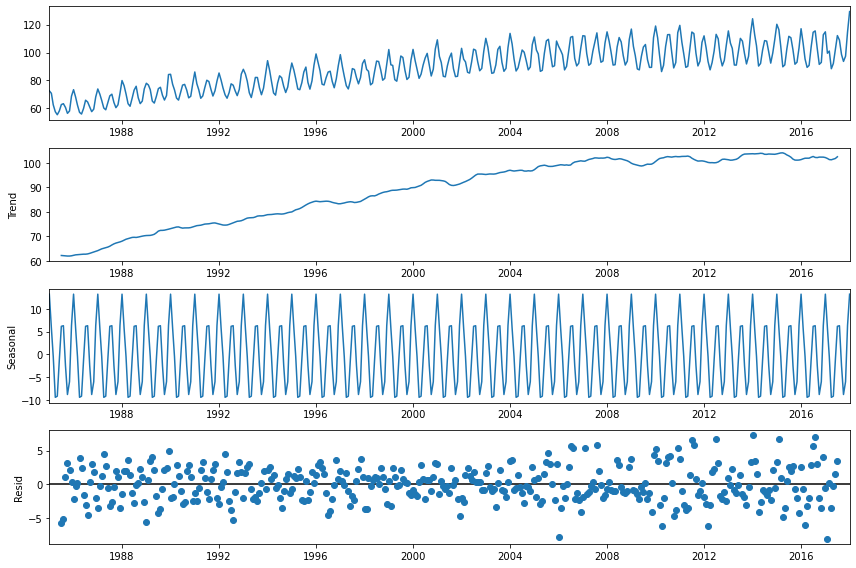

In [34]:
decomp = seasonal_decompose(df)
decomp.plot()
plt.show()

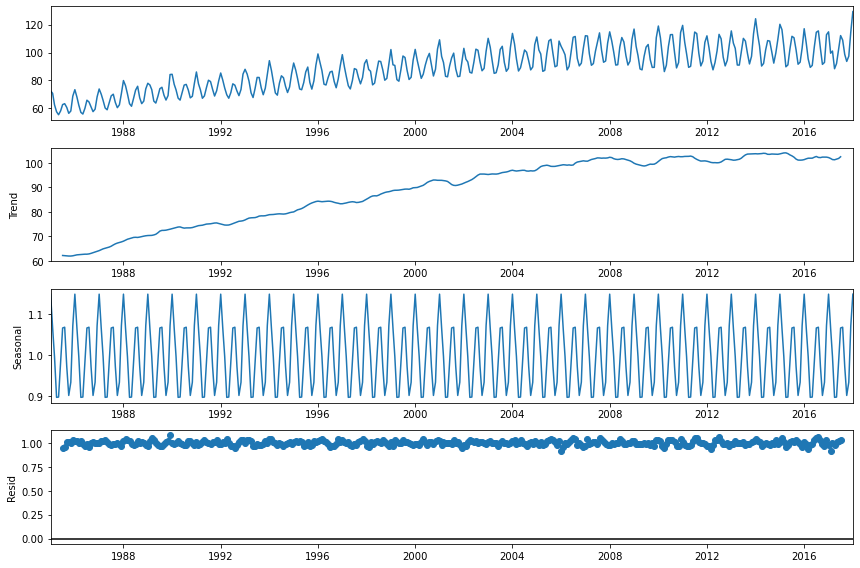

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

decomp = seasonal_decompose(df ,model='multiplicative')
decomp.plot()
plt.show()

**Modifying Time Series Range**

In [40]:
downsampled_ts = df.resample('Y').mean()
downsampled_ts

,Values
Date,
1985-12-31,62.165667
1986-12-31,62.709892
1987-12-31,65.740275
1988-12-31,69.716358
1989-12-31,71.895167
1990-12-31,73.313433
1991-12-31,75.111850
1992-12-31,75.120908
1993-12-31,77.678992


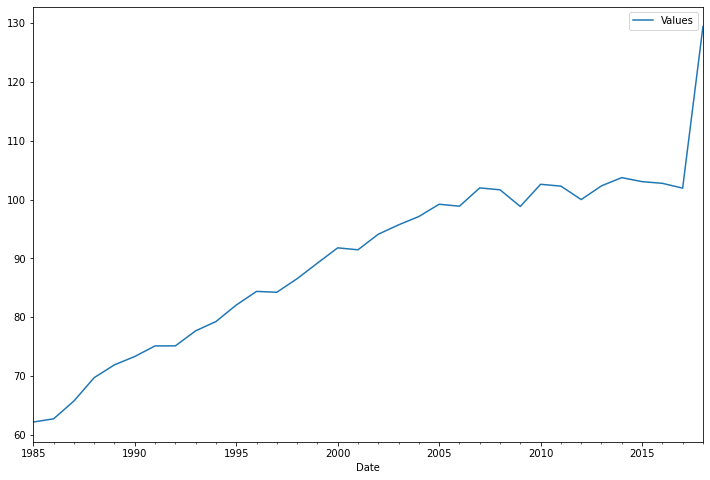

In [42]:
downsampled_ts.plot()
plt.show()

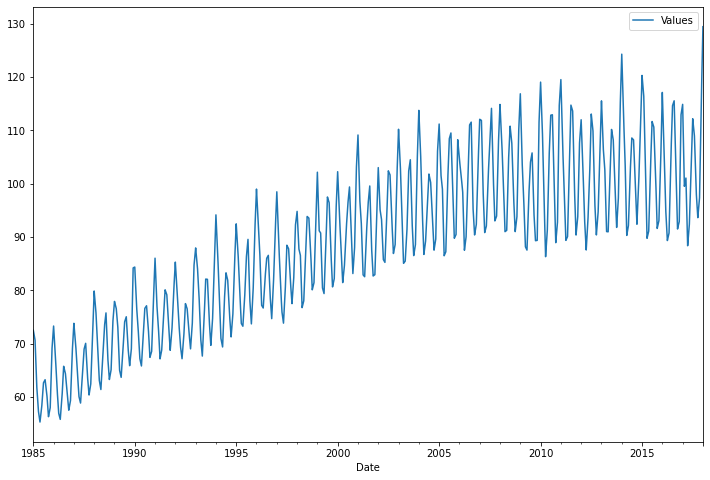

In [43]:
upsampled_ts = df.resample('D').mean()

interpolated = upsampled_ts.interpolate(method = 'linear')
interpolated.plot()
plt.show()



               Values
Date                 
1985-03-31  68.542467
1985-06-30  56.958967
1985-09-30  62.151100
1985-12-31  61.010133
1986-03-31  67.838233


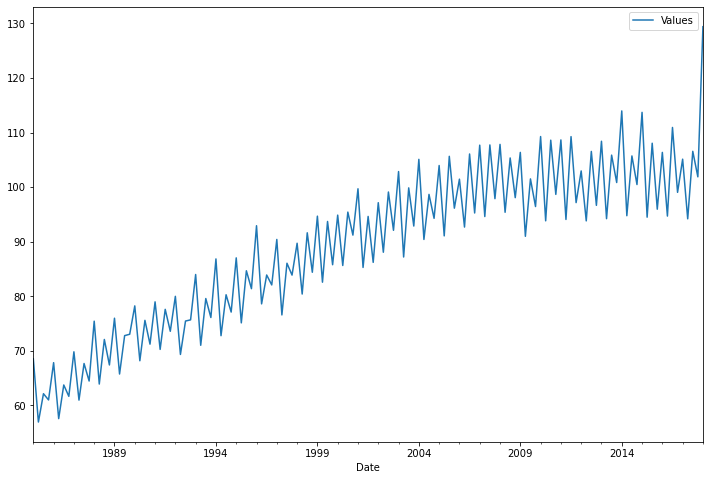

In [44]:
resample             = df.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
plt.show()

In [113]:
df.tail()

,Values
Date,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


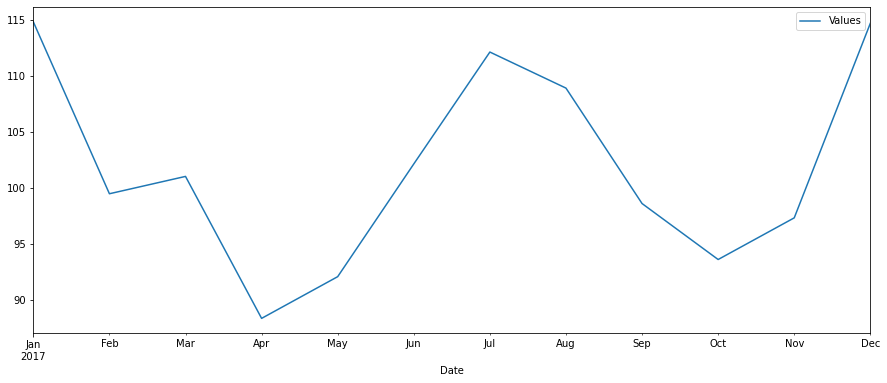

In [120]:
year = df['2017-01-01':'2017-12-01']
year.plot()
plt.show()

**Train-Test-Split**

In [46]:
train =   df[0:int(len(df)*0.7)] 
test  =   df[int(len(df)*0.7):]

In [47]:
print(train.shape)
print(test.shape)

(277, 1)
(120, 1)


In [57]:
train.tail()

,Values
Date,
2007-09-01,101.5316
2007-10-01,93.0068
2007-11-01,93.9126
2007-12-01,106.7528
2008-01-01,114.8331


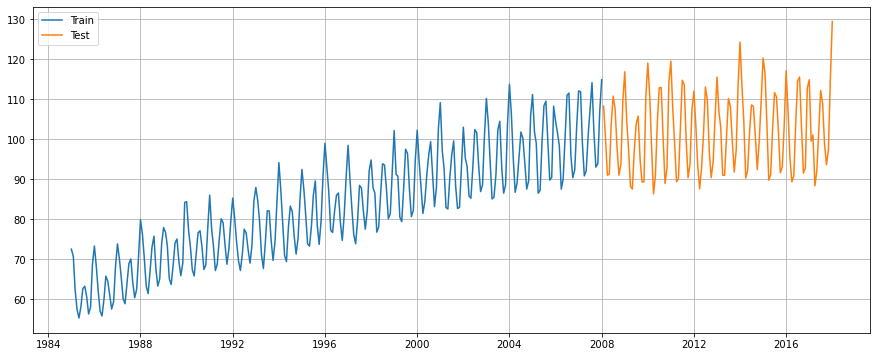

In [59]:
rcParams['figure.figsize'] = 15, 6
plt.plot(train, label = 'Train')
plt.plot(test,label= 'Test')
plt.grid()
plt.legend()
plt.show()

## Forecasting

**Model 1: Linear Regression**

In [62]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [63]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [64]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_model = lr.fit(LinearRegression_train[['time']],LinearRegression_train['Values'])

In [71]:
LinearRegression_test['Result'] = lr_model.predict(LinearRegression_test[['time']])

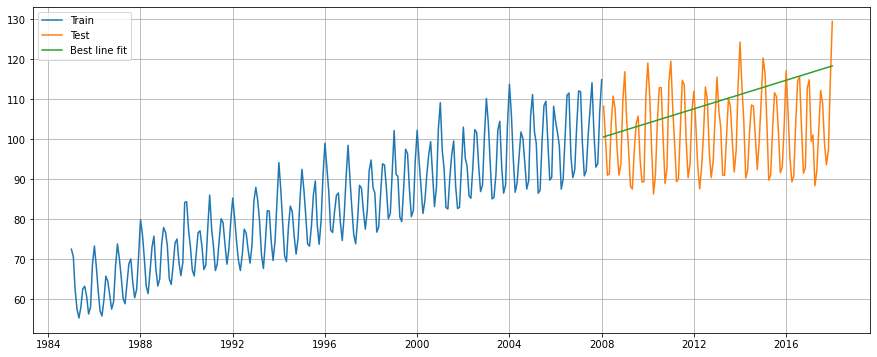

In [72]:
plt.plot(train , label = 'Train')
plt.plot(test , label ='Test')
plt.plot(LinearRegression_test['Result'] , label = 'Best line fit')
plt.grid()
plt.legend()
plt.show()

In [75]:
linear_rmse = np.sqrt(mean_squared_error(LinearRegression_test['Values'], LinearRegression_test['Result']))

In [107]:
Result_df_1 = pd.DataFrame({'RMSE':linear_rmse} , index = ['Linear_Regression'])
Result_df_1

,RMSE
Linear_Regression,12.776777


**Model 2: Naive Approach:**

In [78]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [79]:
NaiveModel_test['naive'] = np.asarray(train['Values'])[len(np.asarray(train['Values']))-1]
NaiveModel_test['naive'].head()

Date
2008-02-01    114.8331
2008-03-01    114.8331
2008-04-01    114.8331
2008-05-01    114.8331
2008-06-01    114.8331
Name: naive, dtype: float64

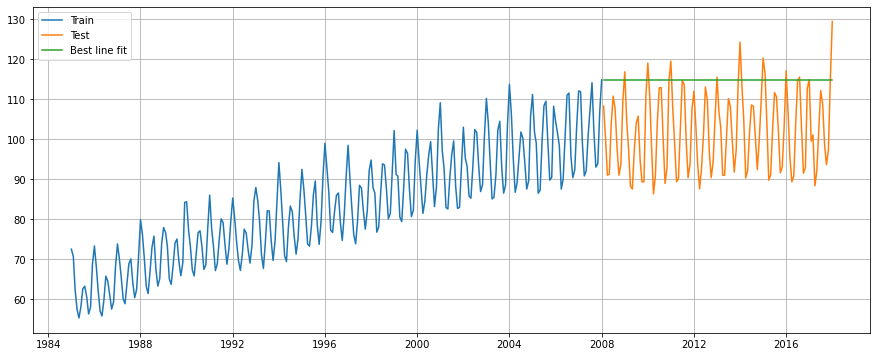

In [80]:
plt.plot(train , label = 'Train')
plt.plot(test , label ='Test')
plt.plot(NaiveModel_test['naive'] , label = 'Best line fit')
plt.grid()
plt.legend()
plt.show()

In [83]:
Naive_rmse = np.sqrt(mean_squared_error(NaiveModel_test['Values'], NaiveModel_test['naive']))

In [108]:
resultsDf_2 = pd.DataFrame({'RMSE': [Naive_rmse]},index=['NaiveModel'])

resultsDf = pd.concat([Result_df_1, resultsDf_2])
resultsDf

,RMSE
Linear_Regression,12.776777
NaiveModel,16.025559


**Method 3: Simple Average**

In [88]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [90]:
SimpleAverage_test['mean_forecast'] = train['Values'].mean()
SimpleAverage_test.head()

,Values,mean_forecast
Date,,
2008-02-01,108.2353,83.130733
2008-03-01,100.4386,83.130733
2008-04-01,90.9944,83.130733
2008-05-01,91.2348,83.130733
2008-06-01,103.9581,83.130733


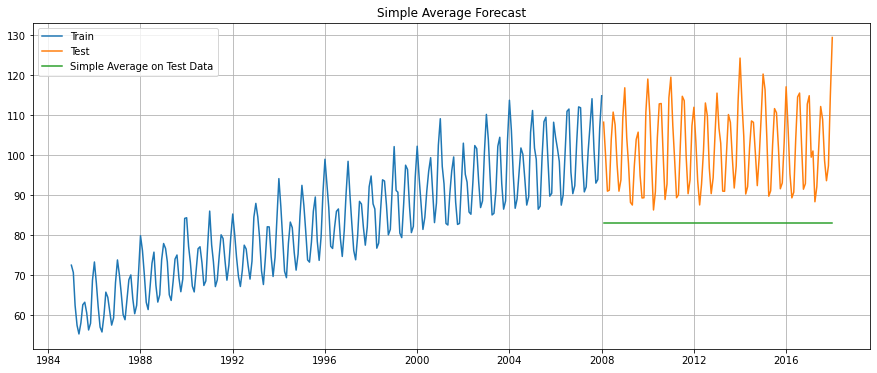

In [91]:
plt.plot(SimpleAverage_train['Values'], label='Train')
plt.plot(SimpleAverage_test['Values'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [93]:
Simple_Avg_rmse = np.sqrt(mean_squared_error(SimpleAverage_test['Values'], SimpleAverage_test['mean_forecast']))

In [109]:
resultsDf_3 = pd.DataFrame({'RMSE': [Simple_Avg_rmse]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
Linear_Regression,12.776777
NaiveModel,16.025559
SimpleAverageModel,21.234196


**Method 4: Moving Average(MA)**

In [96]:
MovingAverage = df.copy()
MovingAverage.head()

,Values
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [97]:
MovingAverage['Trailing_2'] = MovingAverage['Values'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Values'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Values'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Values'].rolling(9).mean()

MovingAverage.head()

,Values,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1985-01-01,72.5052,NaN,NaN,NaN,NaN
1985-02-01,70.6720,71.58860,NaN,NaN,NaN
1985-03-01,62.4502,66.56110,NaN,NaN,NaN
1985-04-01,57.4714,59.96080,65.774700,NaN,NaN
1985-05-01,55.3151,56.39325,61.477175,NaN,NaN


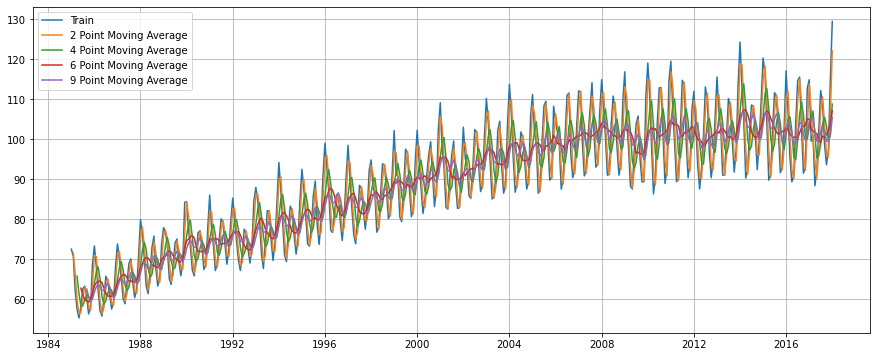

In [99]:
plt.plot(MovingAverage['Values'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid()

In [100]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

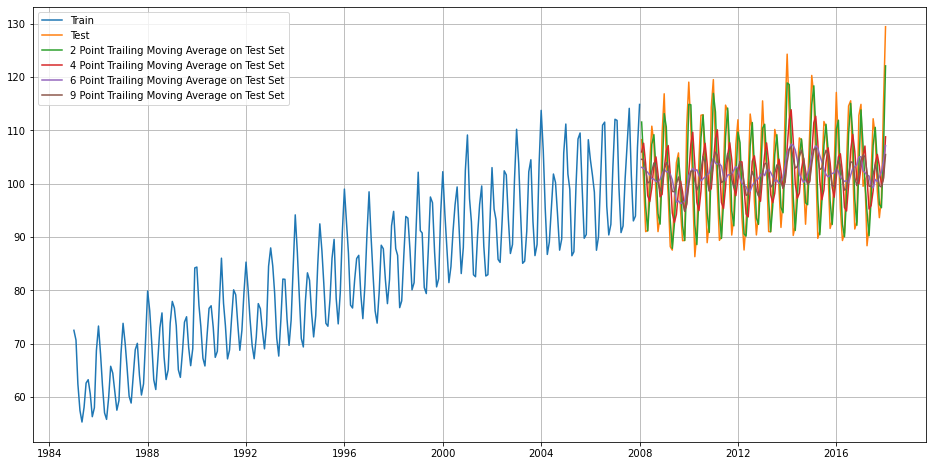

In [102]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Values'], label='Train')
plt.plot(trailing_MovingAverage_test['Values'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [104]:
rmse_model4_test_2 = mean_squared_error(test['Values'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))


rmse_model4_test_4 = mean_squared_error(test['Values'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = mean_squared_error(test['Values'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = mean_squared_error(test['Values'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.774
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 9.951
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 9.419
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 8.911


In [110]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
Linear_Regression,12.776777
NaiveModel,16.025559
SimpleAverageModel,21.234196
2pointTrailingMovingAverage,4.774405
4pointTrailingMovingAverage,9.950566
6pointTrailingMovingAverage,9.418804
9pointTrailingMovingAverage,8.911423


**ExponentialSmoothing**

In [124]:
from statsmodels.tsa.api import ExponentialSmoothing

model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')

model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6088574014337171, 'smoothing_trend': 0.0, 'smoothing_seasonal': 1.3905343851564427e-12, 'damping_trend': nan, 'initial_level': 47.953964084642465, 'initial_trend': 0.09964903468313936, 'initial_seasons': array([1.51904738, 1.41944934, 1.32961537, 1.19958555, 1.19381736,
       1.2997796 , 1.40750777, 1.41952894, 1.2910373 , 1.20080983,
       1.24093955, 1.41897156]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [125]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

2008-02-01    107.625983
2008-03-01    100.947055
2008-04-01     91.194469
2008-05-01     90.874924
2008-06-01     99.070429
                 ...    
2017-09-01    112.684301
2017-10-01    104.928728
2017-11-01    108.558987
2017-12-01    124.274856
2018-01-01    133.190961
Freq: MS, Length: 120, dtype: float64

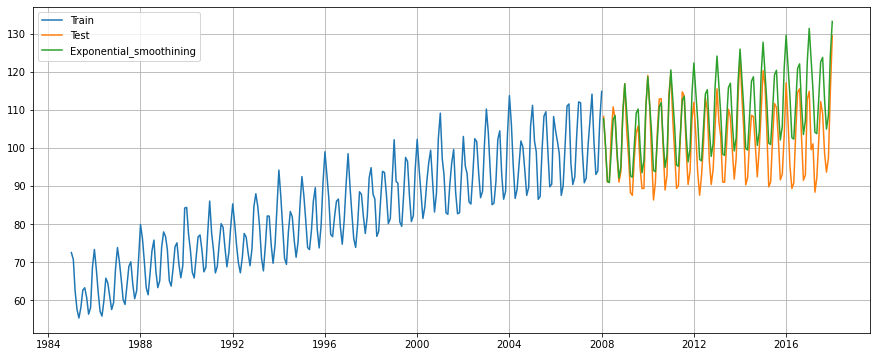

In [128]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_predict_am,label = 'Exponential_smoothining')
plt.legend()
plt.grid()
plt.show()

In [130]:
exponentialsmoothning_rmse = np.sqrt(mean_squared_error(test ,TES_predict_am ))

In [131]:
resultsDf_5 = pd.DataFrame({'RMSE': [exponentialsmoothning_rmse]}
                           ,index=['ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE
Linear_Regression,12.776777
NaiveModel,16.025559
SimpleAverageModel,21.234196
2pointTrailingMovingAverage,4.774405
4pointTrailingMovingAverage,9.950566
6pointTrailingMovingAverage,9.418804
9pointTrailingMovingAverage,8.911423
ExponentialSmoothing,8.236824


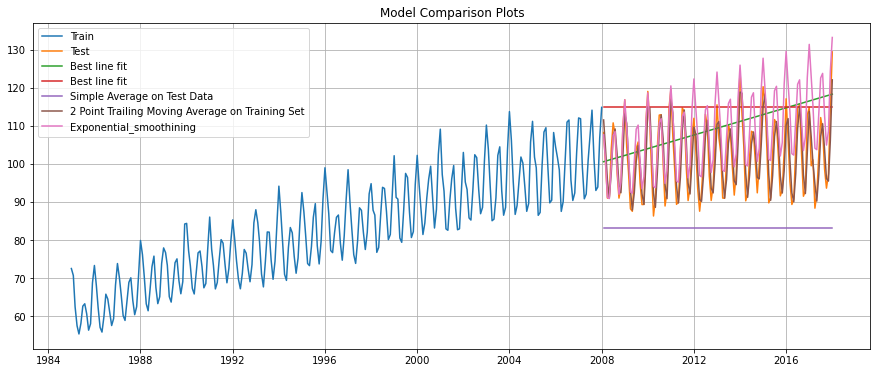

In [132]:
plt.plot(train['Values'], label='Train')
plt.plot(test['Values'], label='Test')

plt.plot(LinearRegression_test['Result'] , label = 'Best line fit')

plt.plot(NaiveModel_test['naive'] , label = 'Best line fit')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(TES_predict_am,label = 'Exponential_smoothining')

plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();